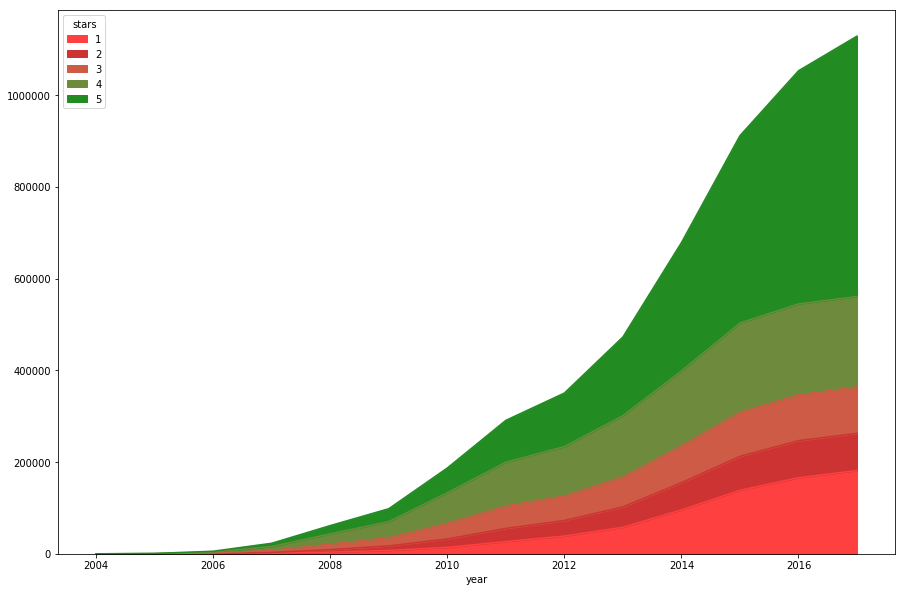

In [2]:
from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
import pandas as pd
import matplotlib as pyplot

spark = SparkSession.builder.appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.json("file:///Users/yashparikh/Project/dataset/review.json")

df.createOrReplaceTempView("reviews")
sqlDF = spark.sql("SELECT year(date) as year, stars FROM reviews").createOrReplaceTempView("yearVsStar")
yearVsStarDF = spark.sql("SELECT year, stars, count(year, stars) as count FROM yearVsStar GROUP BY year, stars order by year, stars").toPandas()

totalCountByYearAndStar = yearVsStarDF.groupby(['year', 'stars']).agg({'count': 'sum'})
totalCountByYear = yearVsStarDF.groupby('year').agg({'count': 'sum'})
totalCountByYearAndStar = totalCountByYearAndStar.div(totalCountByYear, level='year') * 100
totalCountByYearAndStar['year'] = yearVsStarDF['year'].tolist()
totalCountByYearAndStar['stars'] = yearVsStarDF['stars'].tolist()


yearVsStarDF = yearVsStarDF.pivot(index='year', columns='stars', values='count')
yearVsStarDF.plot.area(stacked=True, color=["#FF4040", "#CD3333","#CD5B45", "#6E8B3D", "#228B22"], figsize=(15,10))


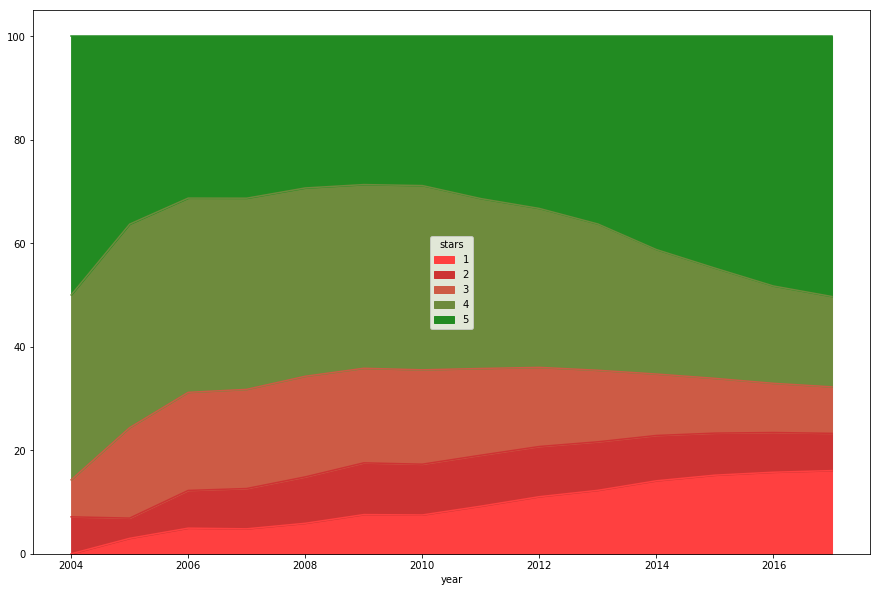

In [3]:
totalCountByYearAndStar = totalCountByYearAndStar.pivot(index='year', columns='stars', values='count')
totalCountByYearAndStar.plot.area(stacked=True, color=["#FF4040", "#CD3333","#CD5B45", "#6E8B3D", "#228B22"], figsize=(15,10))